In [52]:
import imp
from politipy.seatsvotes.gelmanking import abstracts as gk
from politipy.seatsvotes.bootstrap import abstracts as boot
from politipy.seatsvotes.moment_match import abstracts as mm
from politipy.seatsvotes import mixins as mx
from politipy.seatsvotes import rankutils as rut
imp.reload(gk)
imp.reload(mx)
imp.reload(boot)
imp.reload(rut)
imp.reload(mm)
import numpy as np
import sqlalchemy as sql
import geopandas as gpd
import scipy.stats as st
import seaborn as sns


eng = sql.create_engine('postgresql://ljw:forgetmenot'
                        '@shepard.dhcp.asu.edu:9677/research')

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-whitegrid')
mpl.rcParams['font.sans-serif'] = 'DIN'
%matplotlib inline

In [2]:
data = gpd.read_postgis('select * from geo6311 where year >= 2012;',
                        eng, geom_col='the_geom')

In [3]:
data['district_id'] = data.state_fips.apply(lambda x: str(x).rjust(2, '0')) + data.lewis_dist.apply(lambda x: str(x).rjust(2, '0'))

In [4]:
booter = boot.SeatsVotes(data)
mom = mm.SeatsVotes(data)

/home/ljw/mc/envs/py3/lib/python3.5/site-packages/politipy/seatsvotes/gelmanking/utils.py:31: UserWarning: computing redistricting from years vector
  warn('computing redistricting from years vector')
/home/ljw/mc/envs/py3/lib/python3.5/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


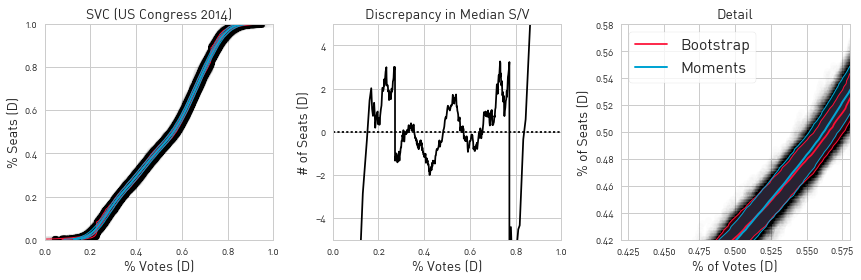

In [23]:
f,ax = plt.subplots(1,3, figsize=(12,4))
np.random.seed(111221)
f,ax[0],hb,rb = booter.plot_simulated_seatsvotes(n_sims=1000, ax=ax[0], 
                                                 return_sims=True)
f,ax[0],hm,rm = mom.plot_simulated_seatsvotes(n_sims=1000, ax=ax[0], 
                                              env_kw=dict(color='#02A4D3'),
                                              median_kw=dict(color='#02A4D3', linewidth=2), return_sims=True)
f,ax[2],hb,rb = booter.plot_simulated_seatsvotes(n_sims=1000, ax=ax[2], 
                                                 return_sims=True, median_kw=dict(label='Bootstrap'))
f,ax[2],hm,rm = mom.plot_simulated_seatsvotes(n_sims=1000, ax=ax[2],
                                              env_kw=dict(color='#02A4D3'),
                                              median_kw=dict(color='#02A4D3', label='Moments', linewidth=2), return_sims=True)
blo, hmedb, bhi = np.asarray([np.percentile(levelset, q=[5,50,95]) 
                      for levelset in rut.shares_at_rank(hb, r=rb).values()]).T
mlo, hmedm, mhi = np.asarray([np.percentile(levelset, q=[5,50,95]) 
                      for levelset in rut.shares_at_rank(hm, r=rm).values()]).T
turnout,__,pvs,*___ = mom._extract_election()

swing = (pvs[0]-.5)

ax[2].fill_betweenx(y=np.arange(1,len(turnout)+1,1)/len(turnout),
                    x1=(1-blo)+swing, x2=(1-bhi)+swing, color='#FD0E35', alpha=.2)
ax[2].fill_betweenx(y=np.arange(1,len(turnout)+1,1)/len(turnout),
                    x1=(1-mlo)+swing, x2=(1-mhi)+swing, color='#02A4D3', alpha=.2)
ax[1].plot(hmedb + (.5 - pvs[0]), (hmedb - hmedm)*len(turnout), c='k')
ax[1].hlines(0,0,1, color='k', linestyle=':')
#ax[0].axis([.45,.55,.45,.51])
ax[1].set_ylim(-5,5)
ax[1].set_xlim(0,1)
ax[0].axis([0,1,0,1])
ax[2].axis([.42,.58,.42,.58])
ax[0].set_ylabel("% Seats (D)", fontsize=14)
ax[0].set_xlabel("% Votes (D)", fontsize=14)
ax[1].set_xlabel("% Votes (D)", fontsize=14)
ax[1].set_ylabel("# of Seats (D)", fontsize=14)
ax[2].set_ylabel("% of Seats (D)", fontsize=14)
ax[2].set_xlabel("% of Votes (D)", fontsize=14)
ax[0].set_title("SVC (US Congress 2014)", fontsize=14)
ax[1].set_title("Discrepancy in Median S/V", fontsize=14)
ax[2].set_title("Detail", fontsize=14)
ax[2].legend(loc='upper left', fontsize=16, frameon=True)
f.tight_layout()
plt.savefig('../../../writing/kit_and_caboodle/figures/boot_vs_mom.png', dpi=300)
plt.show()

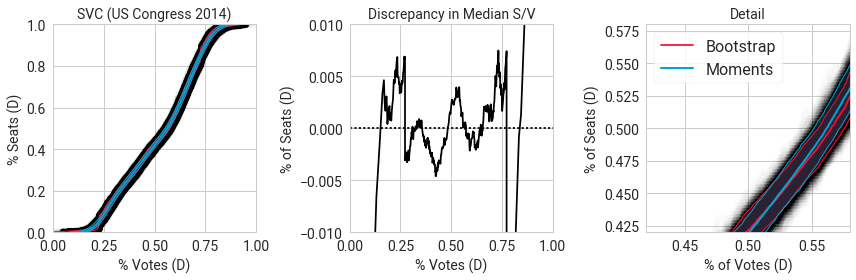

In [30]:
f,ax = plt.subplots(1,3, figsize=(12,4))
np.random.seed(111221)

f,ax[0],hb,rb = booter.plot_simulated_seatsvotes(n_sims=1000, ax=ax[0], 
                                                 return_sims=True)
f,ax[0],hm,rm = mom.plot_simulated_seatsvotes(n_sims=1000, ax=ax[0], 
                                              env_kw=dict(color='#02A4D3'),
                                              median_kw=dict(color='#02A4D3', linewidth=2), return_sims=True)
f,ax[2],hb,rb = booter.plot_simulated_seatsvotes(n_sims=1000, ax=ax[2], 
                                                 return_sims=True, median_kw=dict(label='Bootstrap'))
f,ax[2],hm,rm = mom.plot_simulated_seatsvotes(n_sims=1000, ax=ax[2], 
                                              env_kw=dict(color='#02A4D3'),
                                              median_kw=dict(color='#02A4D3', label='Moments', linewidth=2), return_sims=True)
blo, hmedb, bhi = np.asarray([np.percentile(levelset, q=[5,50,95]) 
                      for levelset in rut.shares_at_rank(hb, r=rb).values()]).T
mlo, hmedm, mhi = np.asarray([np.percentile(levelset, q=[5,50,95]) 
                      for levelset in rut.shares_at_rank(hm, r=rm).values()]).T
turnout,__,pvs,*___ = mom._extract_election()

swing = (pvs[0]-.5)

ax[2].fill_betweenx(y=np.arange(1,len(turnout)+1,1)/len(turnout),
                    x1=(1-blo)+swing, x2=(1-bhi)+swing, color='#FD0E35', alpha=.2)
ax[2].fill_betweenx(y=np.arange(1,len(turnout)+1,1)/len(turnout),
                    x1=(1-mlo)+swing, x2=(1-mhi)+swing, color='#02A4D3', alpha=.2)
ax[1].plot(hmedb + (.5 - pvs[0]), (hmedb - hmedm), c='k')
ax[1].hlines(0,0,1, color='k', linestyle=':')
#ax[0].axis([.45,.55,.45,.51])
ax[1].set_ylim(-.01,.01)
ax[1].set_xlim(0,1)
ax[0].axis([0,1,0,1])
ax[2].axis([.42,.58,.42,.58])
ax[0].set_ylabel("% Seats (D)", fontsize=14)
ax[0].set_xlabel("% Votes (D)", fontsize=14)
ax[1].set_xlabel("% Votes (D)", fontsize=14)
ax[1].set_ylabel("% of Seats (D)", fontsize=14)
ax[2].set_ylabel("% of Seats (D)", fontsize=14)
ax[2].set_xlabel("% of Votes (D)", fontsize=14)
ax[0].set_title("SVC (US Congress 2014)", fontsize=14)
ax[1].set_title("Discrepancy in Median S/V", fontsize=14)
ax[2].set_title("Detail", fontsize=14)
ax[2].legend(loc='upper left', fontsize=16, frameon=True)
f.tight_layout()
plt.savefig('../../../writing/kit_and_caboodle/figures/boot_vs_mom_alt.png', dpi=300)
plt.show()

/home/ljw/mc/envs/py3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


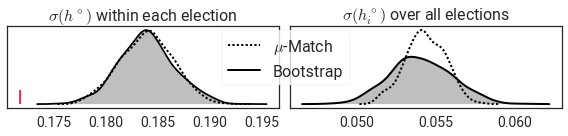

In [31]:
sns.set_style('white')
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

##############

f,ax = plt.subplots(1,2, figsize=(8,2))
#tout, vs ,pvs, *rest = svca._extract_election(t=-1) #this yields post-censoring variance
std = data.vote_share[((data.vote_share > 0) & (data.vote_share < 1))].std()
sns.kdeplot(hm.std(axis=1), color='k', 
            linestyle=':', linewidth=2, 
            label='', ax=ax[0], )
sns.kdeplot(hb.std(axis=1), color='k', shade=True,
            label='', ax=ax[0], )
sns.kdeplot(hm.std(axis=0), color='k', linestyle=':', 
           linewidth=2, label=r'$\mu$-Match', ax=ax[1], )
sns.kdeplot(hb.std(axis=0), color='k', linestyle='-', 
           linewidth=2, label='Bootstrap', ax=ax[1], shade=True, )
ax[0].vlines(std, 0,30, color='#FD0E35')
ax[1].legend(fontsize=16, frameon=True, bbox_to_anchor=(.25,.18))
ax[0].set_title(r'$\sigma(h^\circ)$ within each election', fontsize=16)
ax[1].set_title(r'$\sigma(h^\circ_i)$ over all elections', fontsize=16)
ax[0].set_yticklabels([])
ax[1].set_yticklabels([])
f.tight_layout()
plt.savefig('../../../writing/kit_and_caboodle/figures/'
            'boot_vs_mom_deviations_US_squashed.png', dpi=300 )

######################

sns.set_style('whitegrid')
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

In [26]:
camom = mm.SeatsVotes(data.query('state_name == "california"'))
caboot = boot.SeatsVotes(data.query('state_name=="california"'))

/home/ljw/mc/envs/py3/lib/python3.5/site-packages/politipy/seatsvotes/gelmanking/utils.py:31: UserWarning: computing redistricting from years vector
  warn('computing redistricting from years vector')
/home/ljw/mc/envs/py3/lib/python3.5/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


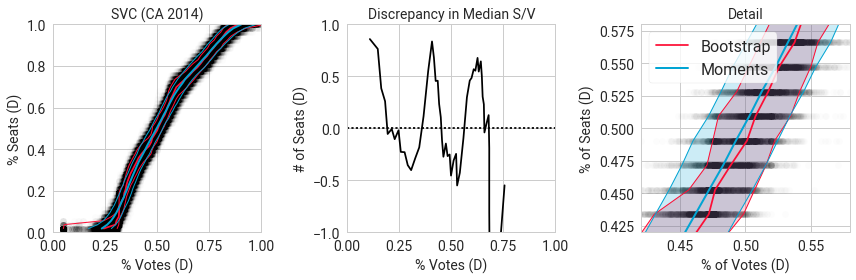

In [33]:
f,ax = plt.subplots(1,3, figsize=(12,4))
np.random.seed(111221)
f,ax[0],hb,rb = caboot.plot_simulated_seatsvotes(n_sims=1000, ax=ax[0], 
                                                 return_sims=True)
f,ax[0],hm,rm = camom.plot_simulated_seatsvotes(n_sims=1000, ax=ax[0], 
                                              env_kw=dict(color='#02A4D3'),
                                              median_kw=dict(color='#02A4D3', linewidth=2), return_sims=True)
f,ax[2],hb,rb = caboot.plot_simulated_seatsvotes(n_sims=1000, ax=ax[2], 
                                                 return_sims=True, median_kw=dict(label='Bootstrap'))
f,ax[2],hm,rm = camom.plot_simulated_seatsvotes(n_sims=1000, ax=ax[2], 
                                              env_kw=dict(color='#02A4D3'),
                                              median_kw=dict(color='#02A4D3', label='Moments', linewidth=2), return_sims=True)
blo, hmedb, bhi = np.asarray([np.percentile(levelset, q=[5,50,95]) 
                      for levelset in rut.shares_at_rank(hb, r=rb).values()]).T
mlo, hmedm, mhi = np.asarray([np.percentile(levelset, q=[5,50,95]) 
                      for levelset in rut.shares_at_rank(hm, r=rm).values()]).T


turnout,__,pvs,*___ = camom._extract_election()

swing = (pvs[0]-.5)

ax[2].fill_betweenx(y=np.arange(1,len(turnout)+1,1)/len(turnout),
                    x1=(1-blo)+swing, x2=(1-bhi)+swing, color='#FD0E35', alpha=.2)
ax[2].fill_betweenx(y=np.arange(1,len(turnout)+1,1)/len(turnout),
                    x1=(1-mlo)+swing, x2=(1-mhi)+swing, color='#02A4D3', alpha=.2)
ax[1].plot(hmedb + (.5 - pvs[0]), (hmedb - hmedm)*len(turnout), c='k')
ax[1].hlines(0,0,1, color='k', linestyle=':')
#ax[0].axis([.45,.55,.45,.51])
ax[1].set_ylim(-1,1)
ax[1].set_xlim(0,1)
ax[0].axis([0,1,0,1])
ax[2].axis([.42,.58,.42,.58])
ax[0].set_ylabel("% Seats (D)", fontsize=14)
ax[0].set_xlabel("% Votes (D)", fontsize=14)
ax[1].set_xlabel("% Votes (D)", fontsize=14)
ax[1].set_ylabel("# of Seats (D)", fontsize=14)
ax[2].set_ylabel("% of Seats (D)", fontsize=14)
ax[2].set_xlabel("% of Votes (D)", fontsize=14)
ax[0].set_title("SVC (CA 2014)", fontsize=14)
ax[1].set_title("Discrepancy in Median S/V", fontsize=14)
ax[2].set_title("Detail", fontsize=14)
ax[2].legend(loc='upper left', fontsize=16, frameon=True)
f.tight_layout()
plt.savefig('../../../writing/kit_and_caboodle/figures/boot_vs_mom_CA2014.png', dpi=300)
plt.show()

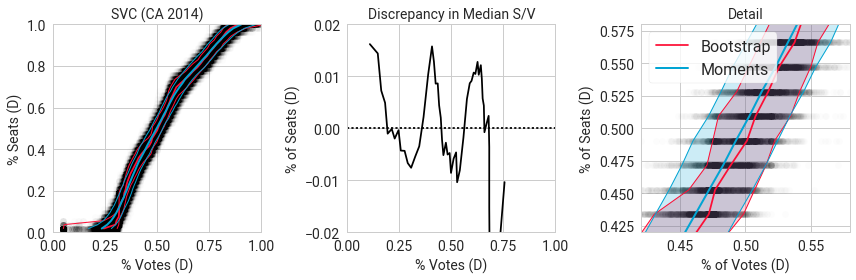

In [34]:
f,ax = plt.subplots(1,3, figsize=(12,4))
np.random.seed(111221)

f,ax[0],hb,rb = caboot.plot_simulated_seatsvotes(n_sims=1000, ax=ax[0], 
                                                 return_sims=True)
f,ax[0],hm,rm = camom.plot_simulated_seatsvotes(n_sims=1000, ax=ax[0], 
                                              env_kw=dict(color='#02A4D3'),
                                              median_kw=dict(color='#02A4D3', linewidth=2), return_sims=True)
f,ax[2],hb,rb = caboot.plot_simulated_seatsvotes(n_sims=1000, ax=ax[2], 
                                                 return_sims=True, median_kw=dict(label='Bootstrap'))
f,ax[2],hm,rm = camom.plot_simulated_seatsvotes(n_sims=1000, ax=ax[2], 
                                              env_kw=dict(color='#02A4D3'),
                                              median_kw=dict(color='#02A4D3', label='Moments', linewidth=2), return_sims=True)
blo, hmedb, bhi = np.asarray([np.percentile(levelset, q=[5,50,95]) 
                      for levelset in rut.shares_at_rank(hb, r=rb).values()]).T
mlo, hmedm, mhi = np.asarray([np.percentile(levelset, q=[5,50,95]) 
                      for levelset in rut.shares_at_rank(hm, r=rm).values()]).T


turnout,__,pvs,*___ = camom._extract_election()

swing = (pvs[0]-.5)

ax[2].fill_betweenx(y=np.arange(1,len(turnout)+1,1)/len(turnout),
                    x1=(1-blo)+swing, x2=(1-bhi)+swing, color='#FD0E35', alpha=.2)
ax[2].fill_betweenx(y=np.arange(1,len(turnout)+1,1)/len(turnout),
                    x1=(1-mlo)+swing, x2=(1-mhi)+swing, color='#02A4D3', alpha=.2)
ax[1].plot(hmedb + (.5 - pvs[0]), (hmedb - hmedm), c='k')
ax[1].hlines(0,0,1, color='k', linestyle=':')
#ax[0].axis([.45,.55,.45,.51])
ax[1].set_ylim(-.02,.02)
ax[1].set_xlim(0,1)
ax[0].axis([0,1,0,1])
ax[2].axis([.42,.58,.42,.58])
ax[0].set_ylabel("% Seats (D)", fontsize=14)
ax[0].set_xlabel("% Votes (D)", fontsize=14)
ax[1].set_xlabel("% Votes (D)", fontsize=14)
ax[1].set_ylabel("% of Seats (D)", fontsize=14)
ax[2].set_ylabel("% of Seats (D)", fontsize=14)
ax[2].set_xlabel("% of Votes (D)", fontsize=14)
ax[0].set_title("SVC (CA 2014)", fontsize=14)
ax[1].set_title("Discrepancy in Median S/V", fontsize=14)
ax[2].set_title("Detail", fontsize=14)
ax[2].legend(loc='upper left', fontsize=16, frameon=True)
f.tight_layout()
plt.savefig('../../../writing/kit_and_caboodle/figures/boot_vs_mom_CA2014_alt.png', dpi=300)
plt.show()

/home/ljw/mc/envs/py3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


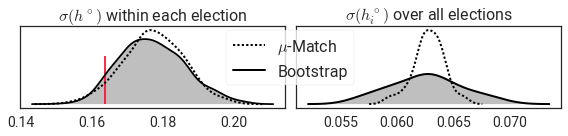

In [29]:
sns.set_style('white')
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

##############

f,ax = plt.subplots(1,2, figsize=(8,2))
#tout, vs ,pvs, *rest = svca._extract_election(t=-1) #this yields post-censoring variance
ca2014 = data.query("state_name == 'california'").query('year == 2014')
std = ca2014.vote_share[((ca2014.vote_share > 0) & (ca2014.vote_share < 1))].std()
sns.kdeplot(hm.std(axis=1), color='k', 
            linestyle=':', linewidth=2, 
            label='', ax=ax[0], )
sns.kdeplot(hb.std(axis=1), color='k', shade=True,
            label='', ax=ax[0], )
sns.kdeplot(hm.std(axis=0), color='k', linestyle=':', 
           linewidth=2, label=r'$\mu$-Match', ax=ax[1], )
sns.kdeplot(hb.std(axis=0), color='k', linestyle='-', 
           linewidth=2, label='Bootstrap', ax=ax[1], shade=True, )
ax[0].vlines(std, 0,30, color='#FD0E35')
ax[1].legend(fontsize=16, frameon=True, bbox_to_anchor=(.25,.18))
ax[0].set_title(r'$\sigma(h^\circ)$ within each election', fontsize=16)
ax[1].set_title(r'$\sigma(h^\circ_i)$ over all elections', fontsize=16)
ax[0].set_yticklabels([])
ax[1].set_yticklabels([])
f.tight_layout()
plt.savefig('../../../writing/kit_and_caboodle/figures/'
            'boot_vs_mom_deviations_squashed.png', dpi=300 )

######################

sns.set_style('whitegrid')
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.OLS(mom.wide[-1].swing, sm.add_constant(mom.wide[-1][['inc', 'uncontested']])).fit().summary()

In [35]:
2*(rut.binreduce.in_band(hb, reduction=np.mean, lower=.495, upper=.505) / 53 - .5) #median bias

0.28794093519278086

In [51]:
rut.binreduce.in_band(hb, reduction=np.mean, lower=.49, upper=.50)

34.131274131274132